<a href="https://colab.research.google.com/github/Apolo073/CODER_Cienciadedatos/blob/main/Comportamiento_Compra%2BStein_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DATA SCIENCE CODERHOUSE [#61750]

ALUMNO: STEIN NAHUEL

## INTRODUCCIÓN

En el ámbito del análisis de datos y la predicción de costos en campañas de marketing, es crucial entender los patrones de consumo y las preferencias de los clientes. Este trabajo práctico se enfoca en analizar un conjunto de datos de una cadena de supermercados en EE. UU., México y Canadá, con el objetivo de validar varias hipótesis relacionadas con el comportamiento de compra de los clientes. Se busca obtener insights valiosos que puedan guiar estrategias de marketing más efectivas y personalizadas.

## DESCRIPCIÓN DEL PROBLEMA

El objetivo principal de este análisis es descubrir y confirmar patrones específicos en el comportamiento de compra de los clientes, que puedan impactar tanto en el costo como en la efectividad de las campañas de marketing. Es esencial entender cómo las distintas variables influyen en las decisiones de compra y los costos asociados a las campañas, para poder así diseñar estrategias de marketing más efectivas.

## FUENTE

Los datos utilizados en este trabajo fueron obtenidos de Kaggle y se encuentran disponibles en el siguiente enlace: https://www.kaggle.com/datasets/yasserh/loan-default-dataset


## **DESARROLLO**:

###1) DATA ACQUISITION

Datos detallados sobre las ventas de varios productos alimenticios, centrándose en alimentos congelados, desayunos, productos horneados y vegetales, en supermercados de EE. UU., México y Canadá.

a) Datos de Ventas y Costos:

Se proporcionan los costos de la tienda y las ventas unitarias correspondientes.

b) Promociones:

Incluye promociones como "Bag Stuffers", "Cash Register Lottery", "High Roller Savings", "Double Down Sale", "Price Savers" y "Super Duper Savers".

c) Demografía de Clientes:

Información sobre estado civil, género, número de hijos, niveles educativos, estado de la tarjeta de miembro, ocupaciones, propiedad de vivienda, promedio de autos en casa, ingreso anual promedio y número de hijos en casa.

d) Detalles del Producto:

Marcas y detalles específicos como peso bruto, peso neto, estado del paquete reciclable, estado bajo en grasa y unidades por caja.
Características de las Tiendas:

e) Tipos de tiendas:

Ciudades y estados de las tiendas, metraje cuadrado de la tienda, metraje cuadrado de comestibles, metraje cuadrado de congelados, metraje cuadrado de carnes. Presencia de barra de café, tienda de videos, barra de ensaladas, comida preparada, floristería.

f) Tipos de medios utilizados para promociones

g) Ubicaciones Geográficas:

Incluye ciudades en México, Canadá y EE. UU.

h) Canales de Publicidad:

Diversos canales como Daily Paper, Radio, TV, In-Store Coupon, Street Handout, Product Attachment, Cash Register Handout, Bulk Mail.

i) Cifras de Ventas:

Datos detallados de ventas para cada producto y ubicación, incluyendo precios, cantidades y efectividad de las promociones.

#### IMPORTACIÓN DE LIBRERIAS

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

#### CARGA BASE DE DATOS

In [5]:
url = "https://raw.githubusercontent.com/Apolo073/DataScience-Entrega1/refs/heads/main/media%20prediction%20and%20its%20cost.csv"
df = pd.read_csv(url)


VALIDACION ESTRUCTURA DE DATASET

####Dimensiones del Dataset

In [6]:
df.shape

(60428, 40)

El conjunto de datos contiene un total de 60428 (registros) y 40 columnas (variables).


#### Primeros registros del archivo:

In [9]:
df.head(5)

,food_category,food_department,food_family,store_sales(in millions),store_cost(in millions),unit_sales(in millions),promotion_name,sales_country,marital_status,gender,...,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,media_type,cost
0,Breakfast Foods,Frozen Foods,Food,7.36,2.7232,4.0,Bag Stuffers,USA,M,F,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",126.62
1,Breakfast Foods,Frozen Foods,Food,5.52,2.5944,3.0,Cash Register Lottery,USA,M,M,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",59.86
2,Breakfast Foods,Frozen Foods,Food,3.68,1.3616,2.0,High Roller Savings,USA,S,F,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",84.16
3,Breakfast Foods,Frozen Foods,Food,3.68,1.1776,2.0,Cash Register Lottery,USA,M,F,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,In-Store Coupon,95.78
4,Breakfast Foods,Frozen Foods,Food,4.08,1.4280,3.0,Double Down Sale,USA,M,M,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,Radio,50.79


####Listado de columnas:

In [7]:
df.columns

Index(['food_category', 'food_department', 'food_family',
       'store_sales(in millions)', 'store_cost(in millions)',
       'unit_sales(in millions)', 'promotion_name', 'sales_country',
       'marital_status', 'gender', 'total_children', 'education',
       'member_card', 'occupation', 'houseowner', 'avg_cars_at home(approx)',
       'avg. yearly_income', 'num_children_at_home',
       'avg_cars_at home(approx).1', 'brand_name', 'SRP', 'gross_weight',
       'net_weight', 'recyclable_package', 'low_fat', 'units_per_case',
       'store_type', 'store_city', 'store_state', 'store_sqft', 'grocery_sqft',
       'frozen_sqft', 'meat_sqft', 'coffee_bar', 'video_store', 'salad_bar',
       'prepared_food', 'florist', 'media_type', 'cost'],
      dtype='object')

#### Validación de columnas, cantidad de datos nulos y tipo de formato

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60428 entries, 0 to 60427
Data columns (total 40 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   food_category               60428 non-null  object 
 1   food_department             60428 non-null  object 
 2   food_family                 60428 non-null  object 
 3   store_sales(in millions)    60428 non-null  float64
 4   store_cost(in millions)     60428 non-null  float64
 5   unit_sales(in millions)     60428 non-null  float64
 6   promotion_name              60428 non-null  object 
 7   sales_country               60428 non-null  object 
 8   marital_status              60428 non-null  object 
 9   gender                      60428 non-null  object 
 10  total_children              60428 non-null  float64
 11  education                   60428 non-null  object 
 12  member_card                 60428 non-null  object 
 13  occupation                  604


No se observan columnas con valores faltantes (non-null count igual que el número total de filas).

#### Descripción de variable numericas

In [ ]:
df.describe()

,store_sales(in millions),store_cost(in millions),unit_sales(in millions),total_children,avg_cars_at home(approx),num_children_at_home,avg_cars_at home(approx).1,SRP,gross_weight,net_weight,...,store_sqft,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,cost
count,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,...,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000
mean,6.541031,2.619460,3.093169,2.533875,2.200271,0.829351,2.200271,2.115258,13.806433,11.796289,...,27988.477494,19133.799696,5312.852552,3541.846280,0.612646,0.354157,0.587956,0.587956,0.562603,99.262366
std,3.463047,1.453009,0.827677,1.490165,1.109644,1.303424,1.109644,0.932829,4.622693,4.682986,...,5701.022090,3987.395735,1575.907263,1050.471635,0.487150,0.478261,0.492207,0.492207,0.496069,30.011257
min,0.510000,0.163200,1.000000,0.000000,0.000000,0.000000,0.000000,0.500000,6.000000,3.050000,...,20319.000000,13305.000000,2452.000000,1635.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.790000
25%,3.810000,1.500000,3.000000,1.000000,1.000000,0.000000,1.000000,1.410000,9.700000,7.710000,...,23593.000000,16232.000000,4746.000000,3164.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69.650000
50%,5.940000,2.385600,3.000000,3.000000,2.000000,0.000000,2.000000,2.130000,13.600000,11.600000,...,27694.000000,18670.000000,5062.000000,3375.000000,1.000000,0.000000,1.000000,1.000000,1.000000,98.520000
75%,8.670000,3.484025,4.000000,4.000000,3.000000,1.000000,3.000000,2.790000,17.700000,16.000000,...,30797.000000,22123.000000,5751.000000,3834.000000,1.000000,1.000000,1.000000,1.000000,1.000000,126.620000
max,22.920000,9.726500,6.000000,5.000000,4.000000,5.000000,4.000000,3.980000,21.900000,20.800000,...,39696.000000,30351.000000,9184.000000,6122.000000,1.000000,1.000000,1.000000,1.000000,1.000000,149.750000


###2) ANÁLISIS EXPLORATORIO - EDA

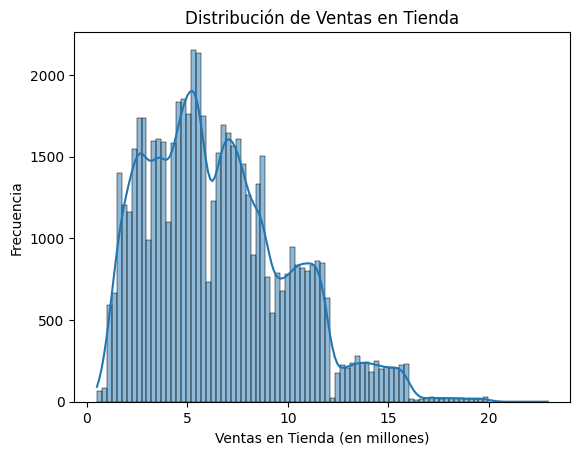

In [14]:
# Distribución de ventas en tienda
sb.histplot(df['store_sales(in millions)'], kde=True)
plt.title('Distribución de Ventas en Tienda')
plt.xlabel('Ventas en Tienda (en millones)')
plt.ylabel('Frecuencia')
plt.show()

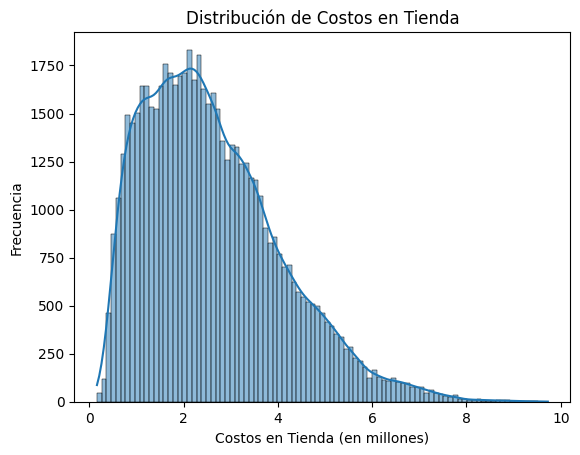

In [16]:
# Distribución de costos en tienda
sb.histplot(df['store_cost(in millions)'], kde=True)
plt.title('Distribución de Costos en Tienda')
plt.xlabel('Costos en Tienda (en millones)')
plt.ylabel('Frecuencia')
plt.show()

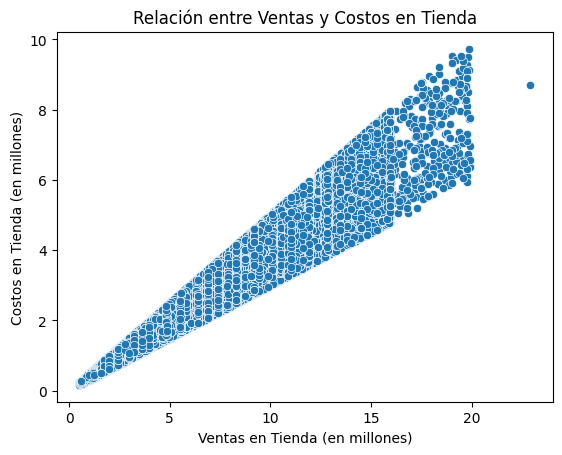

In [17]:
# Relación entre ventas y costos
sb.scatterplot(x='store_sales(in millions)', y='store_cost(in millions)', data=df)
plt.title('Relación entre Ventas y Costos en Tienda')
plt.xlabel('Ventas en Tienda (en millones)')
plt.ylabel('Costos en Tienda (en millones)')
plt.show()

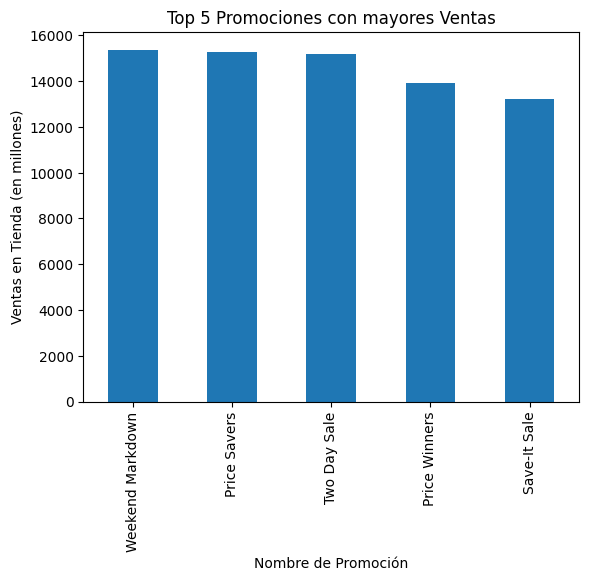

In [ ]:
# Calcular el total de ventas por nombre de promoción
promotion_sales = df.groupby('promotion_name')['store_sales(in millions)'].sum()

# Obtener los 5 nombres de promoción con más ventas
top_5_promotions = promotion_sales.nlargest(5)

# Crear gráfico de barras
fig, ax = plt.subplots()
top_5_promotions.plot(kind='bar', ax=ax)

# Título y etiquetas del gráfico
ax.set_title('Top 5 Promociones con mayores Ventas')
ax.set_xlabel('Nombre de Promoción')
ax.set_ylabel('Ventas en Tienda (en millones)')

# Mostrar gráfico
plt.show()

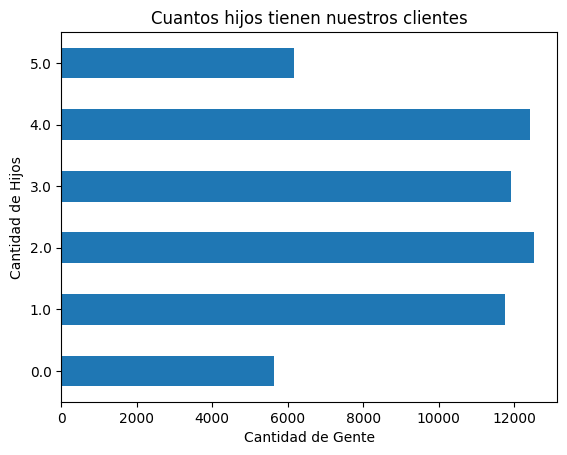

In [18]:
# Contar la cantidad de gente por cantidad de hijos
children_counts = df['total_children'].value_counts().sort_index()

# Crear gráfico de barras horizontales
fig, ax = plt.subplots()
children_counts.plot(kind='barh', ax=ax)

# Título y etiquetas del gráfico
ax.set_title('Cuantos hijos tienen nuestros clientes')
ax.set_xlabel('Cantidad de Gente')
ax.set_ylabel('Cantidad de Hijos')

# Mostrar gráfico
plt.show()

###3) ANÁLSIS ESTADÍSTICO DE DATOS (Univariados, Bivariados y Multivariados)

#### ANALISIS UNIVARIADO

In [20]:
# Análisis univariado de 'store_sales (in millions)'
print("Estadísticas descriptivas de 'store_sales (in millions)':")
print(df['store_sales(in millions)'].describe())

Estadísticas descriptivas de 'store_sales (in millions)':
count    60428.000000
mean         6.541031
std          3.463047
min          0.510000
25%          3.810000
50%          5.940000
75%          8.670000
max         22.920000
Name: store_sales(in millions), dtype: float64


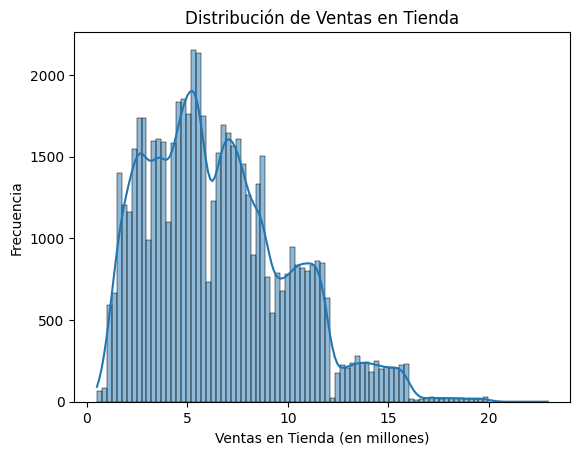

In [22]:
# Histograma de 'store_sales (in millions)'
sb.histplot(df['store_sales(in millions)'], kde=True)
plt.title('Distribución de Ventas en Tienda')
plt.xlabel('Ventas en Tienda (en millones)')
plt.ylabel('Frecuencia')
plt.show()

In [23]:
# Análisis univariado de 'cost'
print("Estadísticas descriptivas de 'cost':")
print(df['cost'].describe())

Estadísticas descriptivas de 'cost':
count    60428.000000
mean        99.262366
std         30.011257
min         50.790000
25%         69.650000
50%         98.520000
75%        126.620000
max        149.750000
Name: cost, dtype: float64


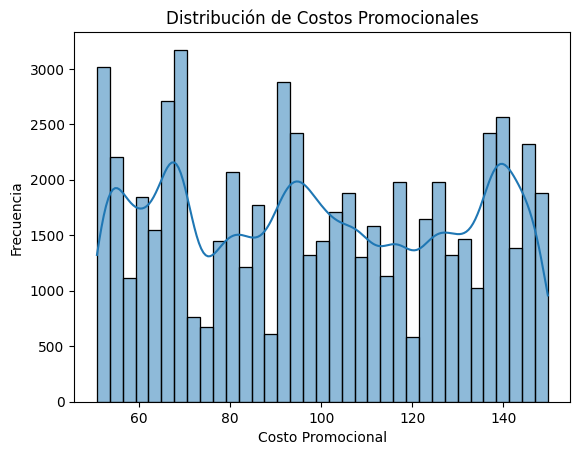

In [25]:
# Histograma de 'cost'
sb.histplot(df['cost'], kde=True)
plt.title('Distribución de Costos Promocionales')
plt.xlabel('Costo Promocional')
plt.ylabel('Frecuencia')
plt.show()

#### ANALISIS BIVARIADO

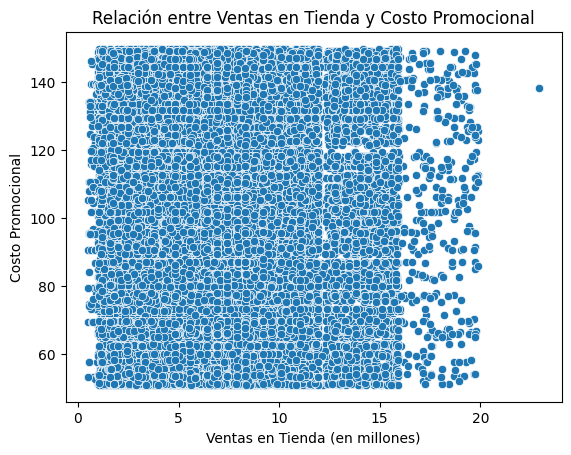

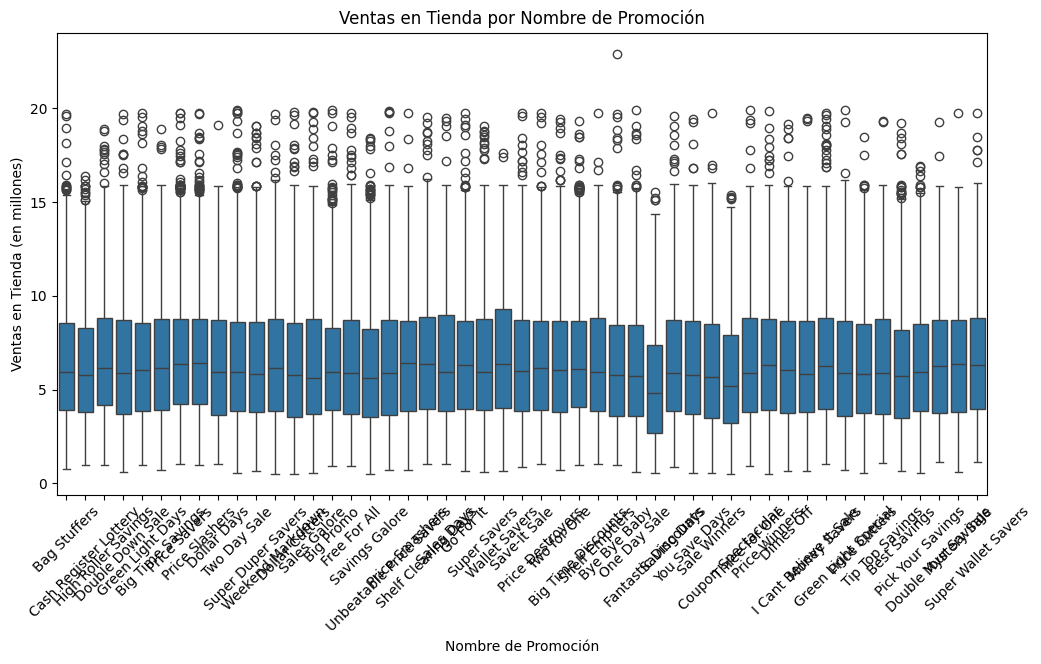

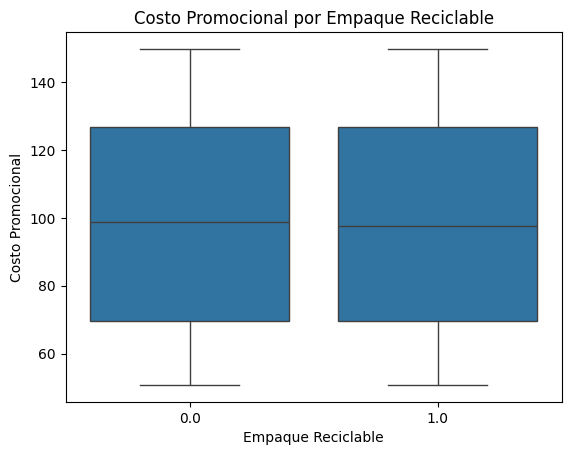

In [27]:
# Relación entre 'store_sales (in millions)' y 'cost'
sb.scatterplot(x='store_sales(in millions)', y='cost', data=df)
plt.title('Relación entre Ventas en Tienda y Costo Promocional')
plt.xlabel('Ventas en Tienda (en millones)')
plt.ylabel('Costo Promocional')
plt.show()

# Boxplot de 'store_sales (in millions)' por 'promotion_name'
plt.figure(figsize=(12, 6))
sb.boxplot(x='promotion_name', y='store_sales(in millions)', data=df)
plt.title('Ventas en Tienda por Nombre de Promoción')
plt.xlabel('Nombre de Promoción')
plt.ylabel('Ventas en Tienda (en millones)')
plt.xticks(rotation=45)
plt.show()

# Boxplot de 'cost' por 'recyclable_package'
sb.boxplot(x='recyclable_package', y='cost', data=df)
plt.title('Costo Promocional por Empaque Reciclable')
plt.xlabel('Empaque Reciclable')
plt.ylabel('Costo Promocional')
plt.show()

#### ANALISIS MULTIVARIADO

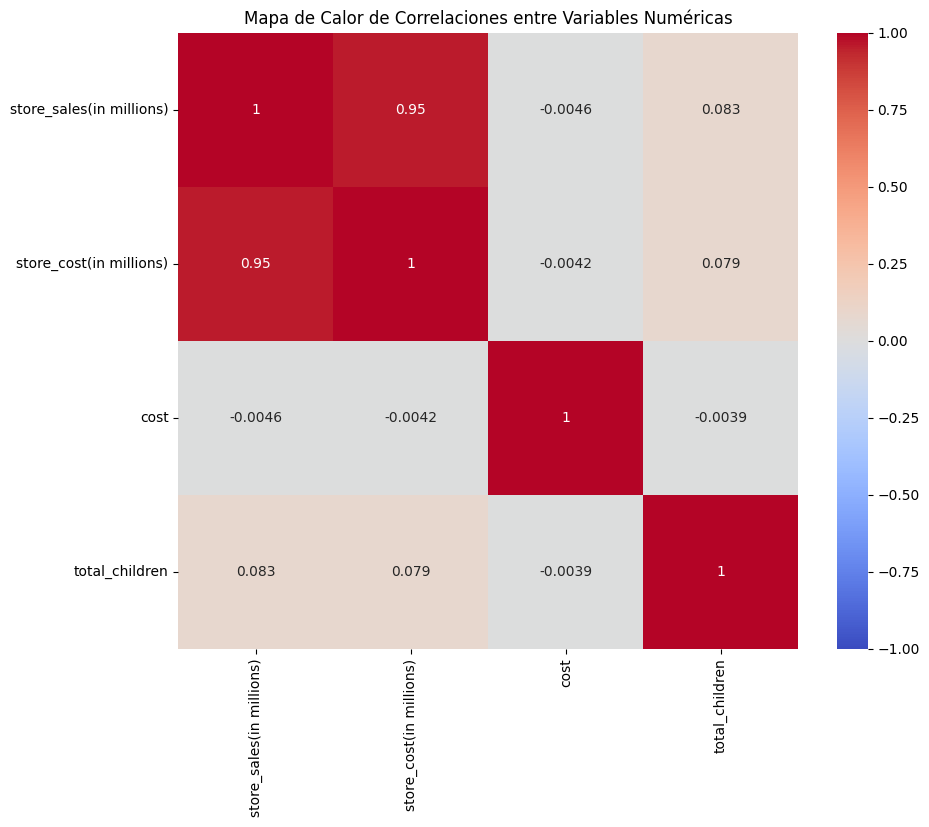

In [30]:
# Heatmap de correlaciones entre variables numéricas
plt.figure(figsize=(10, 8))
correlation_matrix = df[['store_sales(in millions)', 'store_cost(in millions)', 'cost', 'total_children']].corr()
sb.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Mapa de Calor de Correlaciones entre Variables Numéricas')
plt.show()

###4) PREPROCESAMIENTO DE VARIABLES

In [32]:
# Encoding de variables categóricas
df_encoded = pd.get_dummies(df, columns=[
    'food_category', 'food_department', 'food_family', 'promotion_name',
    'sales_country', 'marital_status', 'gender', 'education', 'member_card',
    'occupation', 'houseowner', 'brand_name', 'store_type', 'store_city',
    'store_state', 'media_type'
])

# Nuevas variables
# Se crea una nueva variable que indique si el ingreso anual promedio es mayor a $50K
df_encoded['high_income'] = df_encoded['avg. yearly_income'].apply(
    lambda x: 1 if x in ['$50K - $70K', '$70K - $90K', '$90K - $110K', '$110K - $130K', '$130K - $150K', '$150K +'] else 0
)

# Mostrar las primeras filas del dataframe preprocesado
print(df_encoded.head())

   store_sales(in millions)  store_cost(in millions)  unit_sales(in millions)  \
0                      7.36                   2.7232                      4.0   
1                      5.52                   2.5944                      3.0   
2                      3.68                   1.3616                      2.0   
3                      3.68                   1.1776                      2.0   
4                      4.08                   1.4280                      3.0   

   total_children  avg_cars_at home(approx) avg. yearly_income  \
0             1.0                       1.0        $10K - $30K   
1             0.0                       4.0        $50K - $70K   
2             4.0                       1.0        $10K - $30K   
3             2.0                       2.0        $30K - $50K   
4             0.0                       2.0        $30K - $50K   

   num_children_at_home  avg_cars_at home(approx).1   SRP  gross_weight  ...  \
0                   1.0             

### HIPOTESIS PLANTEADAS

1. Hipótesis 1: La duración de la campaña influye significativamente en el costo total.
2. Hipótesis 2: El tipo de campaña (por ejemplo, online vs. offline) afecta el costo de adquisición de clientes
3. Hipótesis 3: La temporada del año (por ejemplo, verano vs. invierno) tiene un impacto en el costo de las campañas.
4. Hipótesis 4: El presupuesto inicial asignado a la campaña está correlacionado con el costo final de adquisición de clientes.



HIPOTESIS 1: *Proporción de productos bajos en grasa por género*


In [ ]:
df['low_fat'] = df['low_fat'].astype(int)
gender_low_fat = df.groupby('gender')['low_fat'].mean()
print("Proporción de productos bajos en grasa por género:")
print(gender_low_fat)

Proporción de productos bajos en grasa por género:
gender
F    0.356053
M    0.344536
Name: low_fat, dtype: float64


Text(0.5, 1.0, 'Proporción de productos bajos en grasa por género')

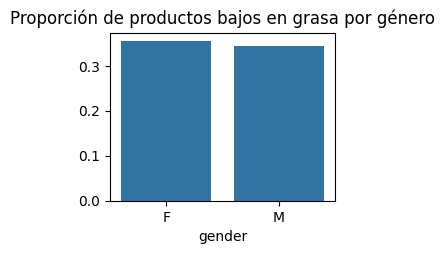

In [ ]:
plt.subplot(2, 2, 1)
sb.barplot(x=gender_low_fat.index, y=gender_low_fat.values)
plt.title('Proporción de productos bajos en grasa por género')

HIPOTESIS 2: Relación entre cantidad de hijos y unidades por caja


Relación entre cantidad de hijos y unidades por caja:
total_children
0.0    18.866999
1.0    18.822770
2.0    18.852133
3.0    18.791964
4.0    18.976342
5.0    18.844520
Name: units_per_case, dtype: float64


Text(0.5, 1.0, 'Relación entre cantidad de hijos y unidades por caja')

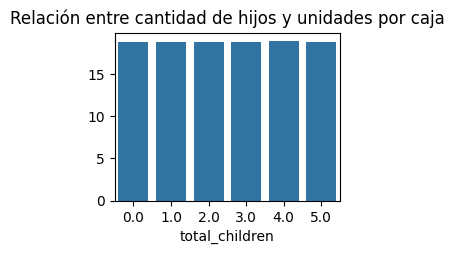

In [ ]:
children_units_per_case = df.groupby('total_children')['units_per_case'].mean()
print("\nRelación entre cantidad de hijos y unidades por caja:")
print(children_units_per_case)

plt.subplot(2, 2, 3)
sb.barplot(x=children_units_per_case.index, y=children_units_per_case.values)
plt.title('Relación entre cantidad de hijos y unidades por caja')

HIPOTESIS 3: Preferencia de tiendas con vivero por propietarios vs inquilinos


Preferencia de tiendas con vivero por propietarios vs inquilinos:
houseowner
N    0.562087
Y    0.562942
Name: florist, dtype: float64


Text(0.5, 1.0, 'Preferencia de tiendas con vivero por propietarios vs inquilinos')

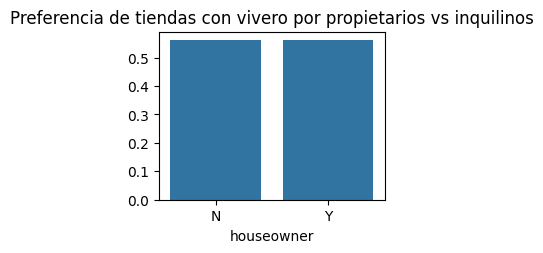

In [ ]:
houseowner_florist = df.groupby('houseowner')['florist'].mean()
print("\nPreferencia de tiendas con vivero por propietarios vs inquilinos:")
print(houseowner_florist)

plt.subplot(2, 2, 1)
sb.barplot(x=houseowner_florist.index, y=houseowner_florist.values)
plt.title('Preferencia de tiendas con vivero por propietarios vs inquilinos')

HIPOTESIS 4: Costo promocional de productos reciclables vs no reciclables


Costo promocional de productos reciclables vs no reciclables:
recyclable_package
0.0    99.320439
1.0    99.216490
Name: cost, dtype: float64


Text(0.5, 1.0, 'Costo promocional de productos reciclables vs no reciclables')

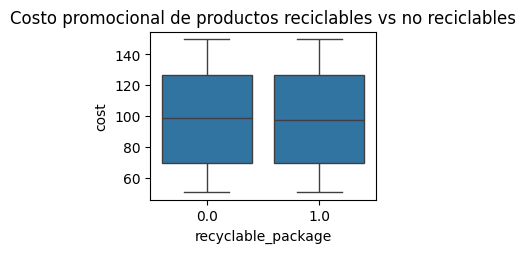

In [ ]:
recyclable_cost = df.groupby('recyclable_package')['cost'].mean()
print("\nCosto promocional de productos reciclables vs no reciclables:")
print(recyclable_cost)

plt.subplot(2, 2, 3)
sb.boxplot(x='recyclable_package', y='cost', data=df)
plt.title('Costo promocional de productos reciclables vs no reciclables')

## **CONCLUSIÓN**

A partir del análisis de las hipótesis planteadas, se pueden extraer las siguientes conclusiones:

**Hipótesis 1**: El análisis muestra que las personas de género femenino consumen una proporción ligeramente mayor de productos bajos en grasa (35.6%) en comparación con las personas de género masculino (34.5%). Aunque la diferencia es pequeña, sugiere que las campañas de marketing que promueven productos bajos en grasa podrían ser ligeramente más efectivas si se dirigen específicamente a mujeres.


**Hipótesis 2:** Los resultados no muestran una tendencia clara de aumento en las unidades por caja con el incremento en la cantidad de hijos. Las unidades por caja fluctúan ligeramente sin un patrón ascendente o descendente definido. Por lo tanto, no se puede concluir que la cantidad de hijos influya significativamente en la decisión de comprar productos en mayores cantidades por caja.


**Hipótesis 3:** Los propietarios de viviendas muestran una preferencia ligeramente mayor por comprar en tiendas que tienen vivero (56.3%) en comparación con los inquilinos (56.2%). Aunque la diferencia es mínima, podría indicar una ligera inclinación de los propietarios hacia tiendas con vivero, posiblemente debido a que tienen más espacio para plantas y jardines.


**Hipótesis 4:** Los productos con empaques reciclables tienen un costo promocional ligeramente menor (99.22) en comparación con los productos no reciclables (99.32). Aunque la diferencia es pequeña, sugiere que los productos reciclables no necesariamente implican un costo promocional más alto. Las campañas que promueven la sostenibilidad y el uso de empaques reciclables podrían no requerir un costo promocional significativamente diferente al de los productos no reciclables.